In [84]:
import math
import numpy as np
import matplotlib.pyplot as pl
from pylab import rcParams
rcParams['figure.figsize'] =  16,12

In [128]:
Bl=.40e6              # Ancho de banda, en Hz
fs=400e6              # Frecuencia de muestreo, in Hz
D=0                 # Latencia en ciclos de reloj de muestreo
Kp=Bl/fs*2*np.pi      # Ganancia proporcional
Ki=Kp*1e-1*1.0        # Ganancia integral

In [129]:
Omega = np.arange(0.000001,1,0.0001)*np.pi
z = [np.exp(np.complex(0,omega)) for omega in Omega]
lineah = [0.5+0j for omega in Omega]
lineah = np.array(lineah)
lineavx = np.full(51,Kp*fs/2/np.pi)
lineavy = np.arange(0,51,1)*-1

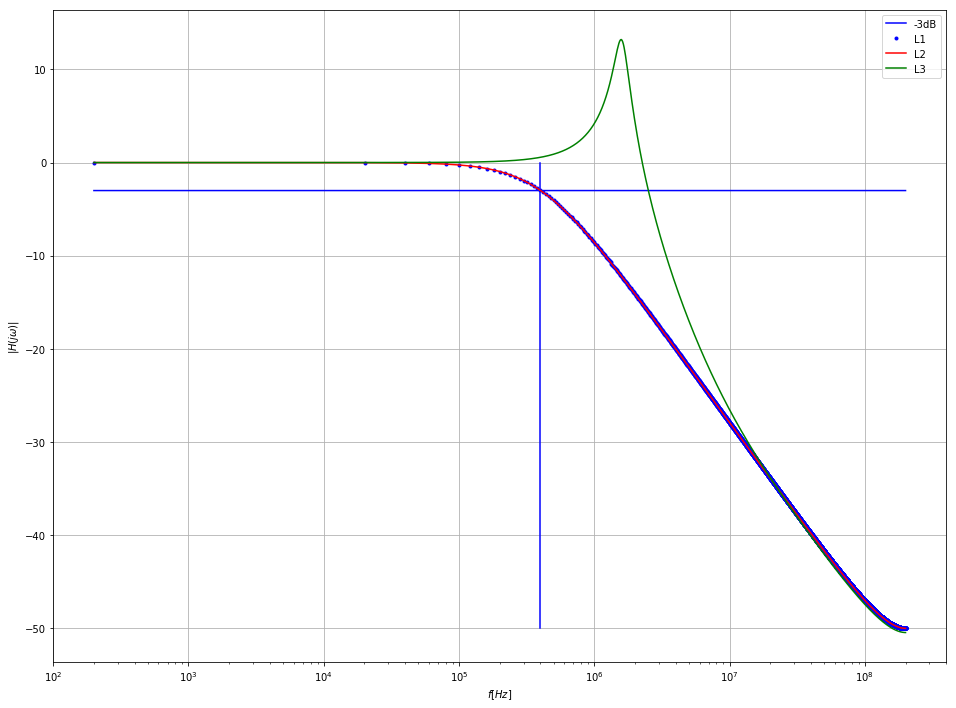

In [130]:
def gen_func_tranfer(delay):
    L1 = Kp
    L2 = np.power(z,-delay)*Kp
    L3 = np.power(z,-delay)*(Kp+Ki*np.power(z,-1)/(1-np.power(z,-1)))

    G1 = L1 * np.power(z,-1)/(1-np.power(z,-1))
    G2 = L2 * np.power(z,-1)/(1-np.power(z,-1))
    G3 = L3 * np.power(z,-1)/(1-np.power(z,-1))

    H1 = G1/(1+G1)
    H2 = G2/(1+G2)
    H3 = G3/(1+G3)
    
    return H1,H2,H3

H1,H2,H3 = gen_func_tranfer(D)

pl.semilogx(lineavx,lineavy,'b')
pl.semilogx(Omega*fs/2/np.pi,10*np.log10(abs(lineah)),'b',label='-3dB')
pl.semilogx(Omega*fs/2/np.pi,20*np.log10(abs(H1)),'b.',label='L1')
pl.semilogx(Omega*fs/2/np.pi,20*np.log10(abs(H2)),'r',label='L2')
pl.semilogx(Omega*fs/2/np.pi,20*np.log10(abs(H3)),'g',label='L3')
pl.xlabel('$f [Hz]$')
pl.ylabel('$|H(j\omega)|$')
pl.legend()
pl.grid(True)

pl.show()

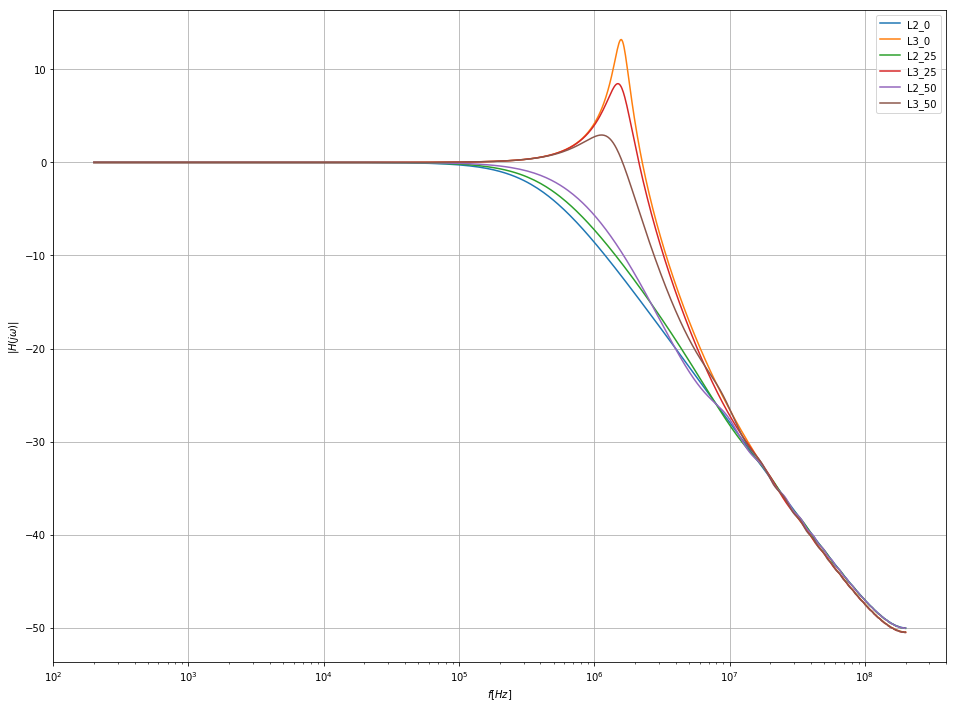

In [131]:
D = [0,25,50]
import itertools
markers = itertools.cycle(['.', 'v', '^', 's', '*', 'D', 'o'])

for delay in D:
    marker = markers.next()
    H1,H2,H3 = gen_func_tranfer(delay)
    pl.semilogx(Omega*fs/2/np.pi,20*np.log10(abs(H2)),label='L2_'+str(delay))
    pl.semilogx(Omega*fs/2/np.pi,20*np.log10(abs(H3)),label='L3_'+str(delay))
pl.xlabel('$f [Hz]$')
pl.ylabel('$|H(j\omega)|$')
pl.legend()
pl.grid(True)

pl.show()

In [89]:
#
# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#

# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

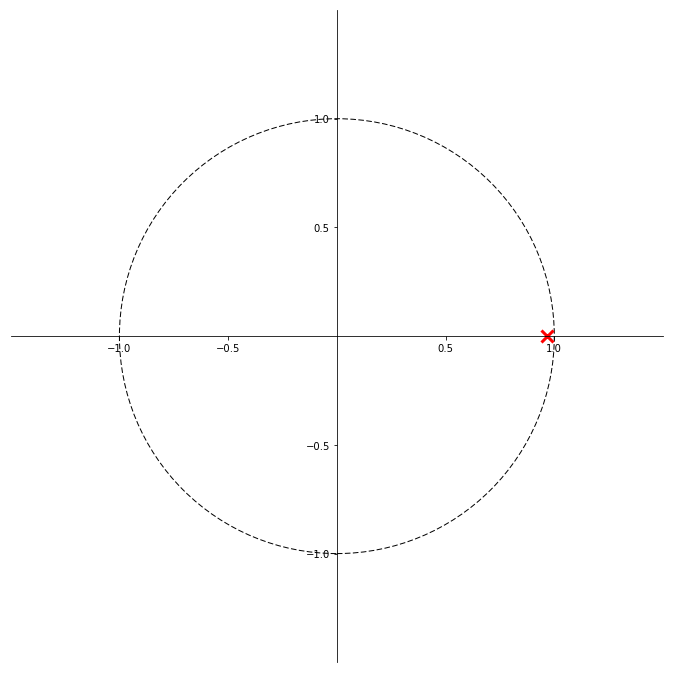

Lista de polos fuera del circulo unitario en L1: []


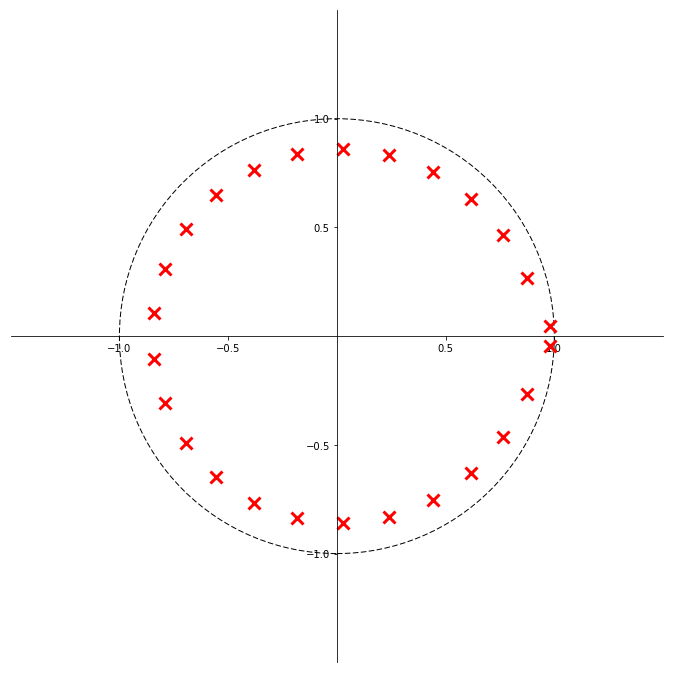

Lista de polos fuera del circulo unitario en L1: []


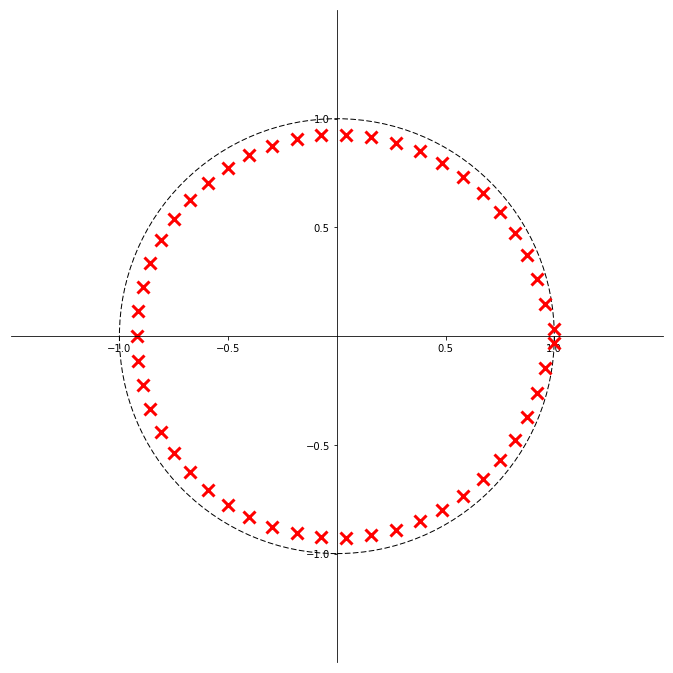

Lista de polos fuera del circulo unitario en L1: [1.0001408265637632, 1.0001408265637632]


In [127]:
def create_pll_L1(D=2,Kp=Kp):
    b=np.zeros(D+2)
    b[D+1]=Kp
    a=np.zeros(D+2)
    #a[0]=1
    a[0]=1
    if(D==0):
        a[D+1]=-1+Kp
    else:
        a[1]=-1
        a[D+1]=Kp
                
    return b,a

Bl=1e6              # Ancho de banda, en Hz
fs=400e6              # Frecuencia de muestreo, in Hz
D = [0,25,50]                 # Latencia en ciclos de reloj de muestreo
Kp=2*Bl/fs*2*np.pi      # Ganancia proporcional
Ki=Kp*1e-1*1.0        # Ganancia integral

for delay in D:
    b,a = create_pll_L1(delay,Kp)
    r,p,k = zplane(b,a)
    print "Lista de polos fuera del circulo unitario en L1: "+str([abs(i) for i in p if abs(i)>1])

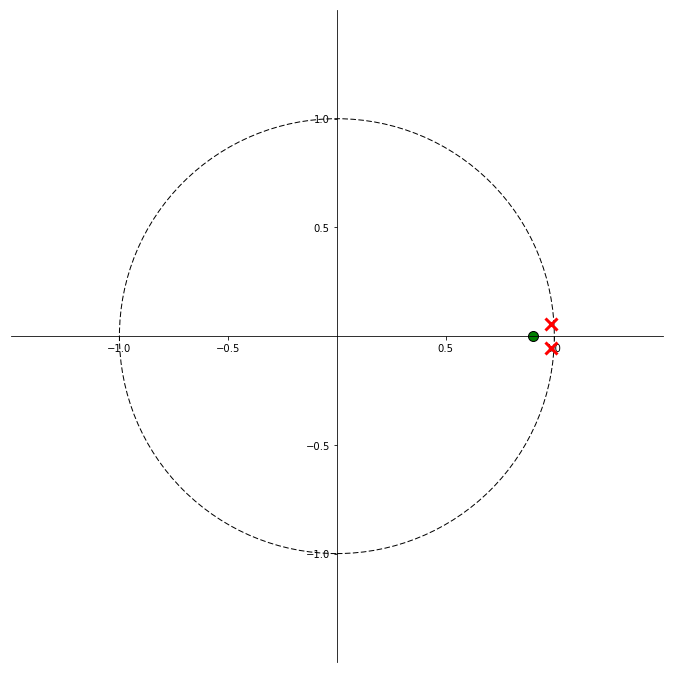

Lista de polos fuera del circulo unitario en L1: []


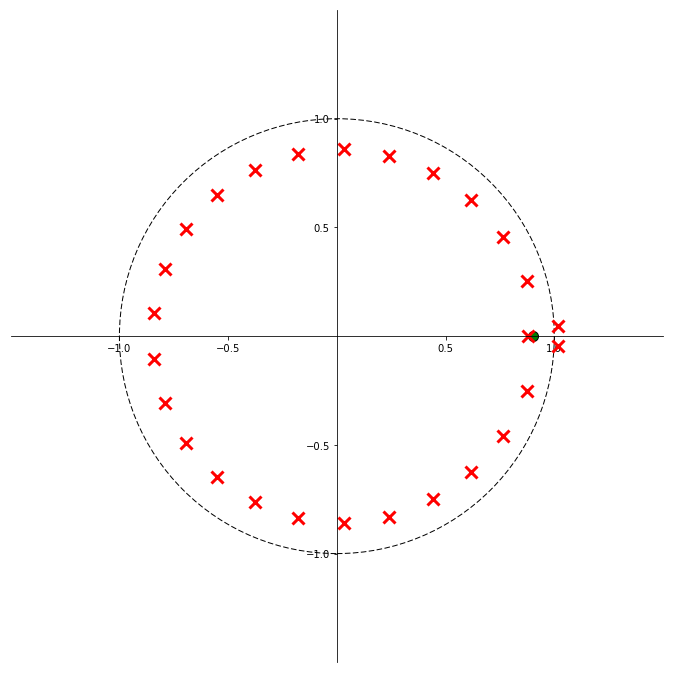

Lista de polos fuera del circulo unitario en L1: [1.0194603702171365, 1.0194603702171365]


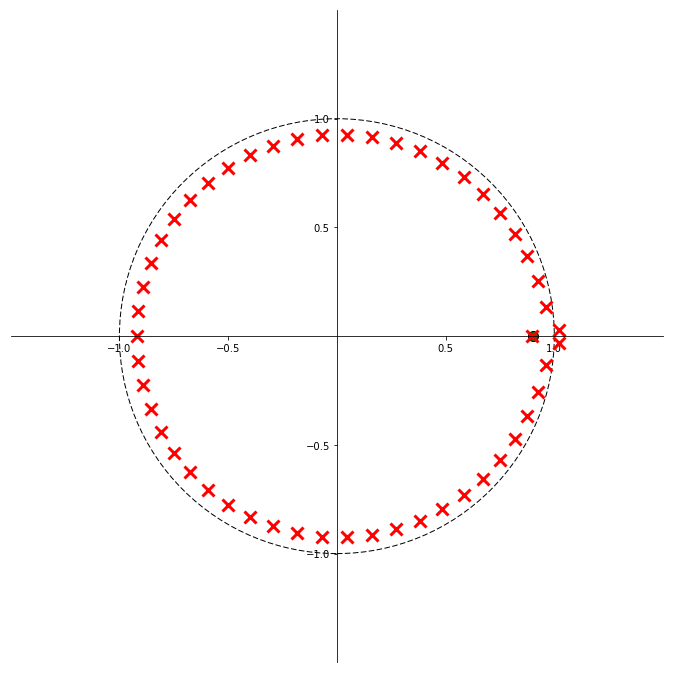

Lista de polos fuera del circulo unitario en L1: [1.0215786261396653, 1.0215786261396653]


In [132]:
def create_pll_L2(D=2,Kp=Kp,Ki=Ki):
    b=np.zeros(D+3)
    b[D+1]=Kp
    b[D+2]=Ki-Kp
    a=np.zeros(D+3)
    #a[0]=1
    a[0]=1
    if(D==0):
        a[1]=-2+Kp
        a[2]=1+Ki-Kp
    else:
        a[1]=-2
        a[2]=1
        a[D+1]=Kp
        a[D+2]=Ki-Kp
                
    return b,a

Bl=1e6              # Ancho de banda, en Hz
fs=400e6              # Frecuencia de muestreo, in Hz
D = [0,25,50]                 # Latencia en ciclos de reloj de muestreo
Kp=2*Bl/fs*2*np.pi      # Ganancia proporcional
Ki=Kp*1e-1*1.0        # Ganancia integral

for delay in D:
    b,a = create_pll_L2(delay,Kp,Ki)
    r,p,k = zplane(b,a)
    print "Lista de polos fuera del circulo unitario en L1: "+str([abs(i) for i in p if abs(i)>1])

In [91]:
f0=.10e6              #Frecuencia de Tono de Jitter
A =.0001              #Amplitud de Tono de Jitter
SNR_TRdB=60.0
SNR_TR=10**(SNR_TRdB/10.0);
Omega_0=2*np.pi*50;  #Offset de frecuencia
TEST_JIT_NOISE=1;     # 1: test de jitter senoidal+ruido / 0: test de offset de frecuencia

In [92]:
def time_simulation(delay,amp_jitter,freq_jitter):
    N = int(7e3) # tiempo de simulacion
    phi_n = 0
    error_pll_n = 0
    error_sum_n = 0
    phi_n_vector = np.zeros(N)
    error_delay_n = np.zeros(delay+1)
    
    for n in range(N):
        tita_n = 2*np.pi*amp_jitter*np.cos(2*np.pi*freq_jitter*n/fs)+Omega_0
        error_n = tita_n - phi_n
        
        error_delay_n[delay] = error_n
        for i in range(delay):
            error_delay_n[i] = error_delay_n[i+1]
        #print "time: "+str(n) + " error: "+str(error_delay_n)
        phi_n_vector[n] = phi_n
        
        phi_n = phi_n + error_pll_n
        
        error_pll_n = Kp * error_delay_n[0] + error_sum_n
        error_sum_n = error_sum_n + error_delay_n[0] * Ki
        
    pl.plot([i/fs for i in range(len(phi_n_vector))][-7000:],phi_n_vector[-7000:]/2/np.pi,label=str(freq_jitter)+"Hz")    

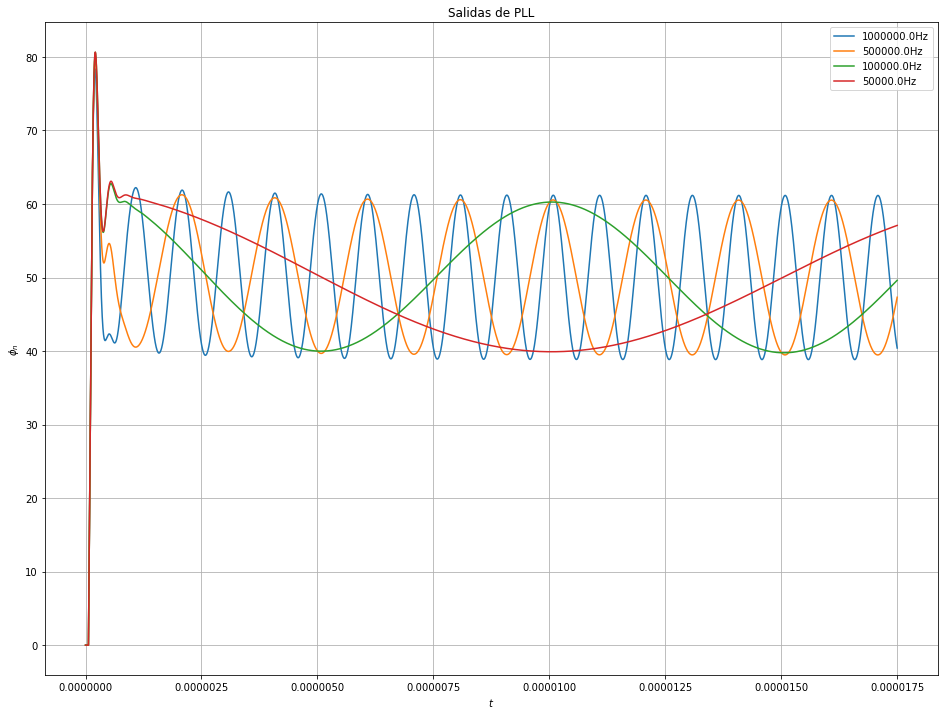

In [143]:
D=25
f0=1e6              #Frecuencia de Tono de Jitter
A=10  # Amplitud de Tono de Jitter

Kp=2*f0/fs*2*np.pi      # Ganancia proporcional
Ki=Kp*1e-3*1.0        # Ganancia integral
time_simulation(D,A,f0)

f0=0.5e6              #Frecuencia de Tono de Jitter
time_simulation(D,A,f0)


f0=0.1e6              #Frecuencia de Tono de Jitter
time_simulation(D,A,f0)


f0=0.050e6              #Frecuencia de Tono de Jitter
time_simulation(D,A,f0)

pl.title('Salidas de PLL')
pl.legend()
pl.xlabel('$t$')
pl.ylabel('$\phi_n$')
pl.grid(True)
pl.legend()
pl.show()